In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/ecommerce_furniture_dataset_2024.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
dataset_info = df.info()
head = df.head()
summary = df.describe(include='all')

df.shape, head, summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  2000 non-null   object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


((2000, 5),
                                         productTitle originalPrice     price  \
 0  Dresser For Bedroom With 9 Fabric Drawers Ward...             0   $46.79    
 1  Outdoor Conversation Set 4 Pieces Patio Furnit...             0  $169.72    
 2  Desser For Bedroom With 7 Fabric Drawers Organ...       $78.40    $39.46    
 3  Modern Accent Boucle Chair,Upholstered Tufted ...             0  $111.99    
 4  Small Unit Simple Computer Desk Household Wood...       $48.82    $21.37    
 
    sold        tagText  
 0   600  Free shipping  
 1     0  Free shipping  
 2     7  Free shipping  
 3     0  Free shipping  
 4     1  Free shipping  ,
        productTitle originalPrice price          sold        tagText
 count          2000          2000  2000   2000.000000           2000
 unique         1794           454  1803           NaN            101
 top               0             0     0           NaN  Free shipping
 freq             94          1530    94           NaN         

<ipython-input-2-95e3d72289eb>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["originalPrice"].fillna(0, inplace=True)
<ipython-input-2-95e3d72289eb>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

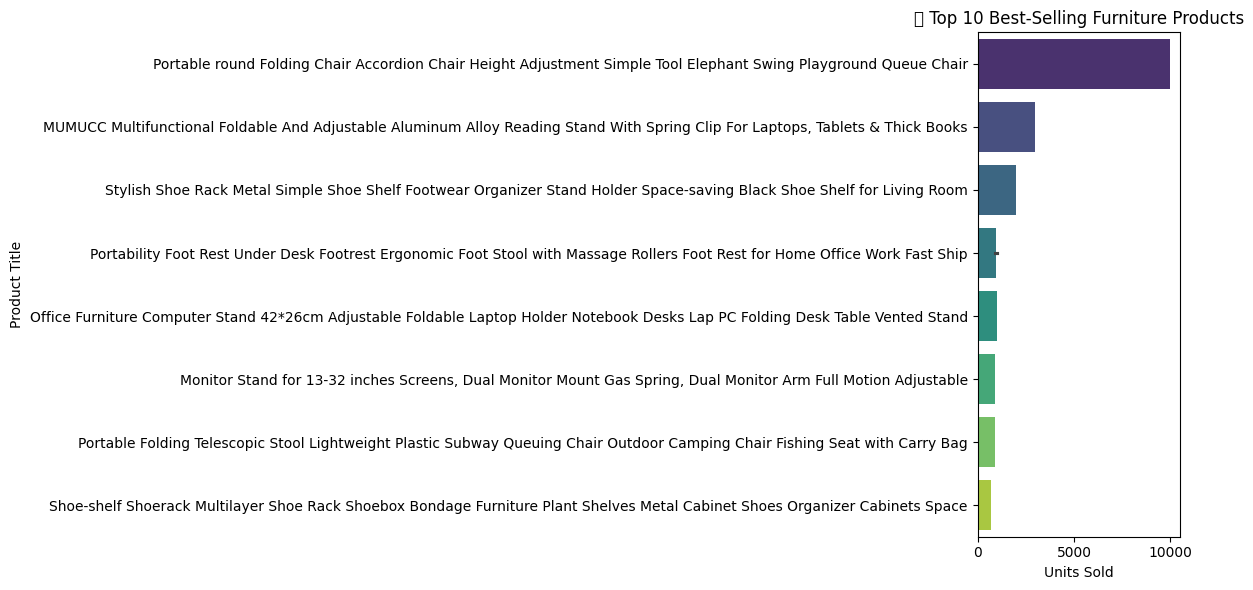

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clean price and originalPrice columns
def clean_price(value):
    try:
        return float(value.replace("$", "").strip())
    except:
        return np.nan

df["originalPrice"] = df["originalPrice"].apply(clean_price)
df["price"] = df["price"].apply(clean_price)

# Fill NaN original prices with 0 if needed
df["originalPrice"].fillna(0, inplace=True)
df["price"].fillna(0, inplace=True)

# Add discount column
df["discount"] = df["originalPrice"] - df["price"]

# Top 10 most sold products
top_sold = df.sort_values(by="sold", ascending=False).head(10)

# Visualization settings
plt.figure(figsize=(12, 6))
sns.barplot(data=top_sold, x="sold", y="productTitle", palette="viridis")
plt.title("🔝 Top 10 Best-Selling Furniture Products")
plt.xlabel("Units Sold")
plt.ylabel("Product Title")
plt.tight_layout()
plt.show()


<ipython-input-3-89865d45962f>:11: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


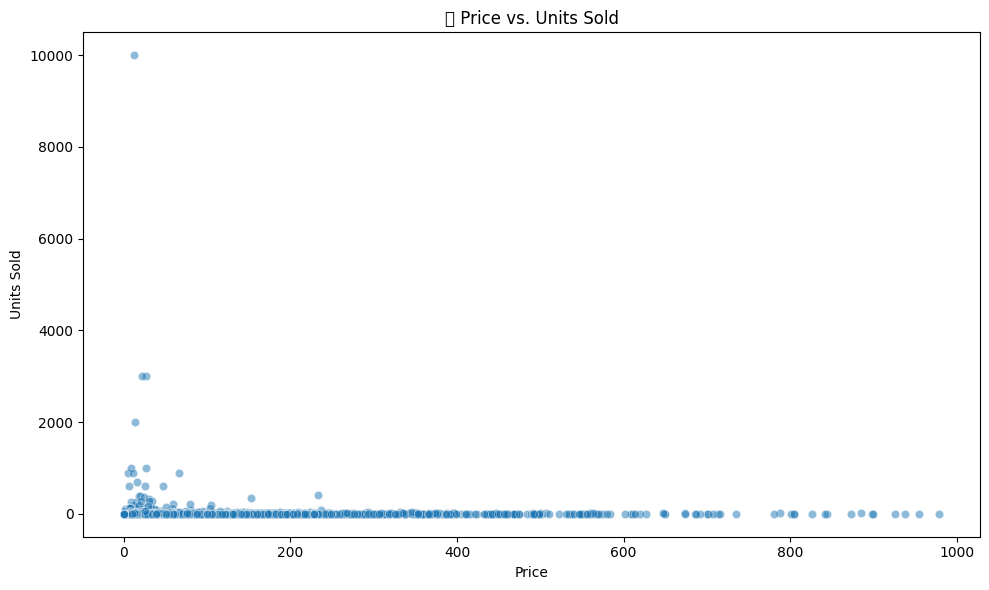

<ipython-input-3-89865d45962f>:20: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


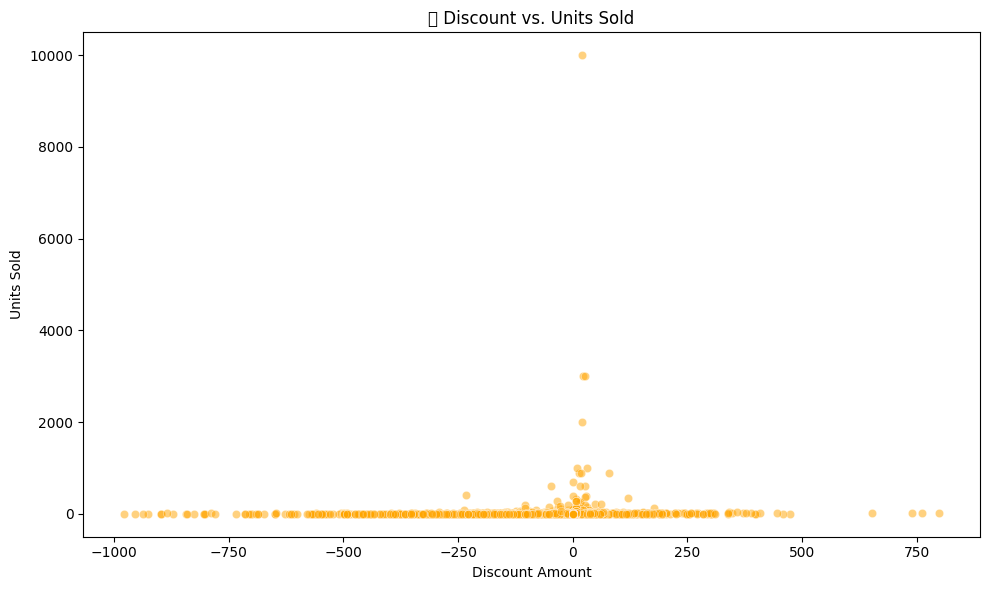

(3201.286638411175, -0.04784338857828585)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Visualization: Price vs. Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="price", y="sold", alpha=0.5)
plt.title("💰 Price vs. Units Sold")
plt.xlabel("Price")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

# Visualization: Discount vs. Units Sold
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="discount", y="sold", alpha=0.5, color='orange')
plt.title("📉 Discount vs. Units Sold")
plt.xlabel("Discount Amount")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()

# Prepare data for modeling
features = df[["price", "originalPrice", "discount"]]
target = df["sold"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model: Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2
